# Integrated CA ML for Business and Data Visualisation

In [1]:
#!pip install jupyter_dash
#!pip install dash

In [2]:
#General
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


# Time Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Text Analytics
import sklearn.feature_extraction.text as sk_txt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('FACEBOOK_REVIEWS.csv')

# Data Pre-Processing

In [4]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,baecdfaa-fdcf-4ec2-8795-f9e1d0885c3a,167801889669597203549,Om******hy,bad app,1,0,318.0.0.39.154,2021-05-19 20:00:27
1,1,12e913d6-105e-4f0c-bb22-4f6a0561cb18,318460545610239421517,Sa****************ol,Really really annoying app ... like if its not...,1,0,317.0.0.51.119,2021-05-19 20:00:29
2,2,7db12237-0f42-4ef7-873b-99495d575331,530587565711923101092,Ca*********04,Cunsurinimo,1,0,293.0.0.43.120,2021-05-19 20:00:29
3,3,6d48f3e8-54c4-417a-83c9-6b198ef7c516,413352731163292273792,Ar**************07,Bad experience,1,0,318.0.0.39.154,2021-05-19 20:00:30
4,4,c4430a84-d74b-4e24-8ed6-1e28110a355b,972610065867074567951,Ab***********kh,Totally pathetic experience too many ads and b...,1,0,308.0.0.42.118,2021-05-19 20:00:30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994736 entries, 0 to 2994735
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   review_id           object
 2   pseudo_author_id    object
 3   author_name         object
 4   review_text         object
 5   review_rating       int64 
 6   review_likes        int64 
 7   author_app_version  object
 8   review_timestamp    object
dtypes: int64(3), object(6)
memory usage: 205.6+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'review_id', 'pseudo_author_id', 'author_name',
       'review_text', 'review_rating', 'review_likes', 'author_app_version',
       'review_timestamp'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'])

In [9]:
df['review_timestamp'].min(), df['review_timestamp'].max()

(Timestamp('2021-05-19 20:00:27'), Timestamp('2023-11-13 23:23:21'))

In [10]:
df.isna().sum()

review_id                  0
pseudo_author_id           0
author_name                0
review_text              450
review_rating              0
review_likes               0
author_app_version    652863
review_timestamp           0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isna().sum()

review_id             0
pseudo_author_id      0
author_name           0
review_text           0
review_rating         0
review_likes          0
author_app_version    0
review_timestamp      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2341493 entries, 0 to 2994735
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   review_id           object        
 1   pseudo_author_id    object        
 2   author_name         object        
 3   review_text         object        
 4   review_rating       int64         
 5   review_likes        int64         
 6   author_app_version  object        
 7   review_timestamp    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 160.8+ MB


## Data Visualisation Part 1

In [13]:
df.describe()

,review_rating,review_likes,review_timestamp
count,2.341493e+06,2.341493e+06,2341493
mean,2.937783e+00,3.510604e+00,2022-04-28 22:59:44.241313536
min,1.000000e+00,0.000000e+00,2021-05-19 20:00:27
25%,1.000000e+00,0.000000e+00,2021-07-16 10:22:16
50%,3.000000e+00,0.000000e+00,2022-02-25 19:34:50
75%,5.000000e+00,0.000000e+00,2022-12-23 00:22:33
max,5.000000e+00,8.418000e+04,2023-11-13 23:23:21
std,1.882540e+00,2.209054e+02,NaN


#### Histplot with the count of review ratings 

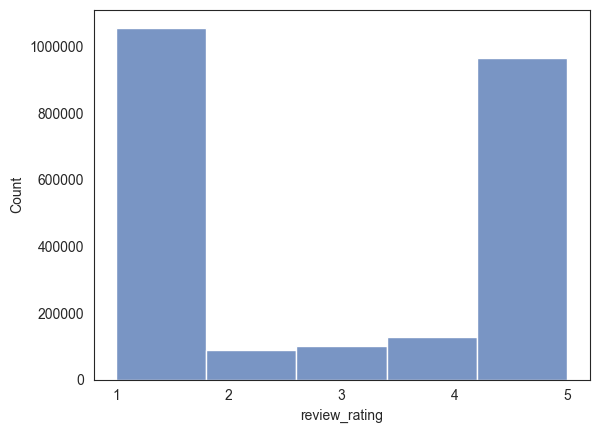

In [14]:
sns.set_style("white") 
sns.set_palette('deep') 
bins = list(set(df['review_rating'].unique()))
ax = sns.histplot(df['review_rating'], bins=5, kde=False)
plt.ticklabel_format(style='plain', axis='y')
ax.set_xticks(bins)
plt.show()

#### Bar Chart with count of review ratings per year

In [15]:
df['Year'] = df['review_timestamp'].dt.year
year = df.groupby(['Year','review_rating']).review_rating.value_counts().reset_index()

In [16]:
fig = px.bar(year,
            x= 'Year',
            y= 'count',
            color = 'review_rating',
            hover_data = {
                'count': ':,.0f'
            })
fig.show()

#### Scatterplot and Trendline with count of review likes by review rating

In [17]:
likes = df.groupby('review_rating')['review_likes'].sum().reset_index()

In [18]:
fig = px.scatter(likes,
         x='review_rating',
         y='review_likes',
         hover_data={
            'review_rating': ':,.f'
         },
         labels={
            'review_rating': 'Rating'
         },
         trendline='ols')
fig.show()

### Feature Creation for Time Series Analysis

In [32]:
df['week'] = df['review_timestamp'].dt.isocalendar().week
df['week'] 

0          20
1          20
2          20
3          20
4          20
           ..
2994731    46
2994732    46
2994733    46
2994734    46
2994735    46
Name: week, Length: 2341493, dtype: UInt32

In [33]:
df['year'] = df['review_timestamp'].dt.year
df_2023 = df[df['year'] == 2023]
df_2023.sample(10)

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,Year,month,year,week
2357975,faa06315-38e8-4e3a-b056-1af9c56cd22b,108559132423474492780,Sk******ok,fecebook is super app,5,0,402.1.0.24.84,2023-02-27 01:33:38,2023,2,2023,9
2934639,3337c57c-f285-47cb-bd27-d77692e1fe75,496640908118585631665,Mu****************ni,Bad,1,0,404.0.0.35.70,2023-10-30 02:27:45,2023,10,2023,44
2448642,fc71951c-0d60-450d-8256-104bf15f4292,256748483039078547978,Ni*******ad,omho5mpopokomkk,3,0,332.0.0.23.111,2023-04-13 05:01:02,2023,4,2023,15
2885845,f1af8f0e-8bc4-40fc-a2b1-5a58de9a48b4,353011758009056690025,am******ez,Double standards and racism. There is no freed...,1,1,437.0.0.35.116,2023-10-25 01:55:46,2023,10,2023,43
2677253,3c66f5b3-ec1b-40d1-a462-216a35a80f5c,235088810611019506495,Ro**************ng,it's good!👍😊😊,5,0,371.0.0.24.109,2023-08-21 19:05:37,2023,8,2023,34
2705943,aaf168e6-c296-4989-9afa-afc0370de261,298051806372120991960,Su********al,Good,2,0,430.0.0.23.113,2023-09-08 00:30:41,2023,9,2023,36
2453720,23f599d7-a0a9-4a73-b30b-b09d8ab770ce,162392827289399044757,Ad**************r.,"Too much trash suggested, really annoying",1,0,410.0.0.26.115,2023-04-16 12:04:48,2023,4,2023,15
2897927,48401f4e-0f04-42f9-bfde-c92792cd8752,324218644608254945779,Na*******as,"Racist platform towards palastenians, and just...",1,0,437.0.0.35.116,2023-10-26 03:47:32,2023,10,2023,43
2290222,4dc8112d-a06c-4c73-9621-d45ab7a3b842,635786793255922230758,ma****aq,Good,5,0,332.0.0.23.111,2023-01-16 14:42:25,2023,1,2023,3
2959970,dc33d94f-4772-4b97-9118-ade43e6b486d,133015734367409313151,Mu***************ni,"Hari ni aku delete account ak sebab fb, ig smu...",1,0,437.0.0.35.116,2023-11-03 17:23:02,2023,11,2023,44


In [26]:
unique_reviews_per_month = df.groupby('month')['review_id'].nunique().reset_index(name='unique_reviews')
unique_reviews_per_month

,month,unique_reviews
0,1,107731
1,2,99205
2,3,117584
3,4,101356
4,5,549071
5,6,208203
6,7,206522
7,8,195090
8,9,171878
9,10,318883


<Axes: xlabel='month'>

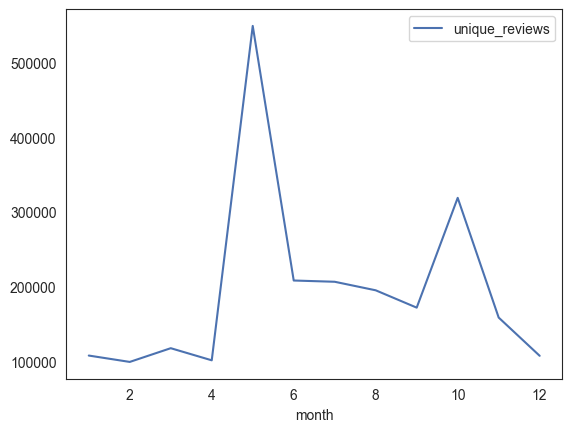

In [30]:
unique_reviews_per_month.plot(x="month", y="unique_reviews")

In [28]:
adfuller(unique_reviews_per_month['unique_reviews'])

(3.6421944171357956,
 1.0,
 4,
 7,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733},
 159.91981151890786)

In [34]:
unique_reviews_per_week = df.groupby('week')['review_id'].nunique().reset_index(name='unique_reviews')
unique_reviews_per_week

,week,unique_reviews
0,1,22972
1,2,23638
2,3,25171
3,4,25944
4,5,26619
5,6,25103
6,7,24151
7,8,23637
8,9,23986
9,10,22816


<Axes: xlabel='week'>

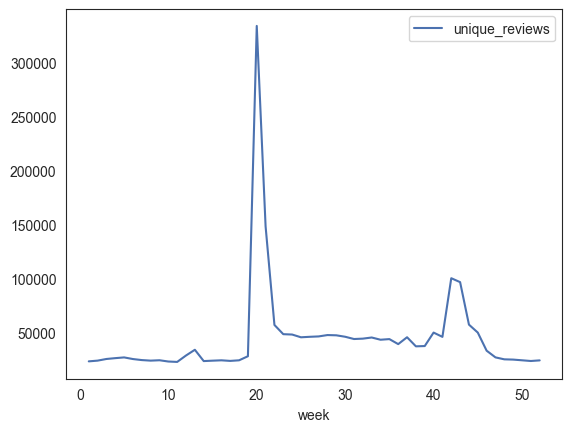

In [36]:
unique_reviews_per_week.plot(x="week", y="unique_reviews")

In [35]:
adfuller(unique_reviews_per_week['unique_reviews'])
# p-value < 0.05, so we can reject the null hypothesis that the data is not stationary

(-4.829146745620644,
 4.781740027636205e-05,
 0,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 980.4060372444992)